In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In questa lezione vedremo come configurare dei (semplici) modelli di CNN.

Lavoreremo sul dataset MNIST, che contiene $60.000$ immagini di numeri scritti a mano. Ovviamente, il problema che affronteremo sarà un problema *multiclasse*, in cui il numero di classi è pari a $10$, tante quante sono le cifre in base decimale.

Ogni immagine presente nel dataset avrà dimensioni pari a $28 \times 28$ pixel; inoltre, essendo presente soltanto un canale, l'immagine sarà monocromatica, a livelli di grigio. Iniziamo quindi andando a creare due costanti (`NUM_CLASSES` ed `INPUT_SHAPE`) che caratterizzino rispettivamente il numero di classi e le dimensioni di ciascuna immagine.

In [2]:
NUM_CLASSES = 10
INPUT_SHAPE = (28, 28, 1)


def preprocess(design_matrix):
    X = design_matrix.astype('float32') / 255
    if not X.shape[-1] in [1, 3]:
        X = np.expand_dims(X, -1)
    return X

Notiamo che `INPUT_SHAPE` tiene conto anche del numero di canali presenti nell'immagine.

La funzione `preprocess` agisce sulla matrice di design, convertendola in formato `float`, se necessario, e riportandola tra `0` ed `1`. Inoltre, aggiunge una dimensione ad `X`, se necessario, per fare in modo che sia organizzabile secondo un batch.

Applichiamo questa funzione ad `X_train` ed `X_test`, ed utilizziamo la funzione `to_categorical` per convertire `y_train` ed `y_test` usando il one-hot encoding.

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train
# Preprocessing X_train - X_test
X_train = preprocess(X_train)
X_test = preprocess(X_test)
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

Mostriamo a schermo le prime nove immagini del dataset `X_train`.

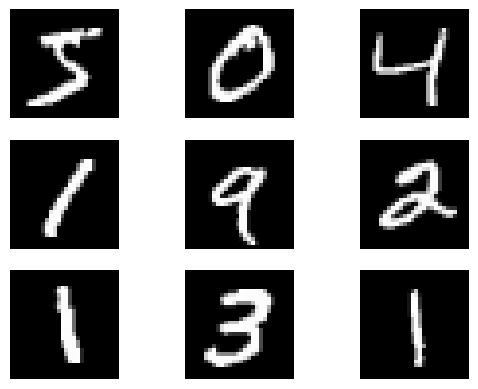

In [4]:
plt.figure()

for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, :, :, :], cmap='gray')
    plt.axis('off')

Creiamo un primo semplice modello che abbia un singolo layer convoluzionale seguito da un layer di max pooling.

In [5]:
# Model creation
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=INPUT_SHAPE))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [6]:
history_simple = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5140 - categorical_accuracy: 0.8607 - precision: 0.9308 - recall: 0.7720
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3166 - categorical_accuracy: 0.9076 - precision: 0.9303 - recall: 0.8864
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2920 - categorical_accuracy: 0.9153 - precision: 0.9350 - recall: 0.8978
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2725 - categorical_accuracy: 0.9213 - precision: 0.9395 - recall: 0.9050
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2503 - categorical_accuracy: 0.9285 - precision: 0.9455 - recall: 0.9138
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2250 - categorical_accuracy: 0.9367 - precision: 0.9526 - recall: 0.9233
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1982 - categoric

Proviamo ad aumentare la complessità del modello inserendo due layer convoluzionali consecutivi.

In [7]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=INPUT_SHAPE))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(),
    metrics=[
        keras.metrics.CategoricalAccuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall()
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [8]:
history_complex = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5967 - categorical_accuracy: 0.8223 - precision_1: 0.9299 - recall_1: 0.7315
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1821 - categorical_accuracy: 0.9456 - precision_1: 0.9583 - recall_1: 0.9347
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1319 - categorical_accuracy: 0.9600 - precision_1: 0.9678 - recall_1: 0.9530
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1088 - categorical_accuracy: 0.9673 - precision_1: 0.9736 - recall_1: 0.9622
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0949 - categorical_accuracy: 0.9702 - precision_1: 0.9759 - recall_1: 0.9662
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0851 - categorical_accuracy: 0.9740 - precision_1: 0.9782 - recall_1: 0.9703
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/

Completiamo il modello usando un layer di Dropout.

In [9]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=INPUT_SHAPE))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(),
    metrics=[
        keras.metrics.CategoricalAccuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall()
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 800)              

In [10]:
history_dropout = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7557 - categorical_accuracy: 0.7571 - precision_2: 0.9055 - recall_2: 0.6495
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2481 - categorical_accuracy: 0.9269 - precision_2: 0.9446 - recall_2: 0.9092
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1890 - categorical_accuracy: 0.9436 - precision_2: 0.9560 - recall_2: 0.9324
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1635 - categorical_accuracy: 0.9512 - precision_2: 0.9606 - recall_2: 0.9425
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1448 - categorical_accuracy: 0.9575 - precision_2: 0.9656 - recall_2: 0.9500
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1350 - categorical_accuracy: 0.9598 - precision_2: 0.9669 - recall_2: 0.9531
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/